<a href="https://colab.research.google.com/github/rafasuzuki/DataScience/blob/main/Regressao_de_seguro_de_vida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão com Pycaret - Seguro de vida.

O seguro de vida visa a proteção econômica do segurado e sua família. Garantindo indenização ao beneficiário em caso de falecimento do segurado. Além de também em certos tipos de seguro, obter respaldo financeiro em caso de incapacidade temporária. 
Há ainda seguros de vida ainda mais completos que cobrem até quitações de dívidas e despesas educacionais.
Para aquisição de tais benefícios existe um valor, que não é fixo. A seguradora precisa examinar a vida do segurado para se chegar ao valor da apólice. 

Nesse projeto criaremos um modelo de Machine Learning para predizer os valores de seguro com base em um dataset disponivel na própria biblioteca do Pycaret.

<p align="center"><img src="https://filoo.com.br/wp-content/uploads/2021/07/seguro-de-vida.png" width="60%"></p>




O Pycaret é uma biblioteca open-source que tem como objetivo reduzir o tempo do ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Todas as operações realizadas com o PyCaret estão carregadas em uma pipeline que está pronta para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais. 


A princípio iremos instalar a biblioteca do Pycaret e o configurar para o modo Colab



In [1]:
#instalando o pycaret
!pip install pycaret -q

     |████████████████████████████████| 266 kB 5.1 MB/s 
     |████████████████████████████████| 167 kB 58.4 MB/s 
     |████████████████████████████████| 261 kB 34.8 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 271 kB 68.9 MB/s 
     |████████████████████████████████| 2.0 MB 42.0 MB/s 
     |████████████████████████████████| 1.3 MB 57.1 MB/s 
     |████████████████████████████████| 6.8 MB 41.3 MB/s 
     |████████████████████████████████| 1.7 MB 34.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 113 kB 54.7 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 596 kB 67.5 MB/s 
     |████████████████████████████████| 3.1 MB 22.9 MB/s 
     |███████████████████

In [2]:
# configurando para o Colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


O Pycaret possui datasets e sua forma própria para carregá-los. São diversos tipos de conjunto de dados e todos são bem interessantes.

Nesse projeto como dito antes iremos trabalhar com o dataset de Seguro de Vida (insurance).

Mas você pode ver os outros datasets [aqui](https://pycaret.org/get-data/).

In [3]:
#importando os dados do repositório do Pycaret
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Irei criar um dicionário das variáveis para um melhor entendimento do que se trata nosso conjunto de dados.

*   `age` - Idade
*  `sex` - Sexo 
*  ` bmi` - Índice de massa corporal
* `children` - Quantidade de filhos
*  ` smoker` - Fumante
*   `region` - Região
*   `charges` - Valor do seguro 














### Análise Exploratória

Sempre que temos um dataset desconhecido é interessante fazermos uma análise exploratória. Fazemos isso para além de conhecermos com o que estamos trabalhando, garantir que o dataset esteja limpo e nos ofereça os melhores resultados possiveis.


Como podemos ver abaixo, nosso conjunto de dados dispõe de 1338 entradas com 7 variáveis.

In [4]:
#visualizando o tamanho do dataset
print(data.shape)

(1338, 7)


Nossas variáveis não possuem valores nulos. O que será ótimo para nosso modelo.

In [5]:
#procurando por dados ausentes
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Através do método `.describe()` podemos ver nossos dados estatísticos, como valores máximos e mínimos e a média e mediana das nossas variáveis numéricas.

In [6]:
#visualizando os dados estatisticos 
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Irei também plotar histogramas das variáveis numéricas afim de entender melhor a distribuição dos dados e também poder visualizar algum possivel outlier.

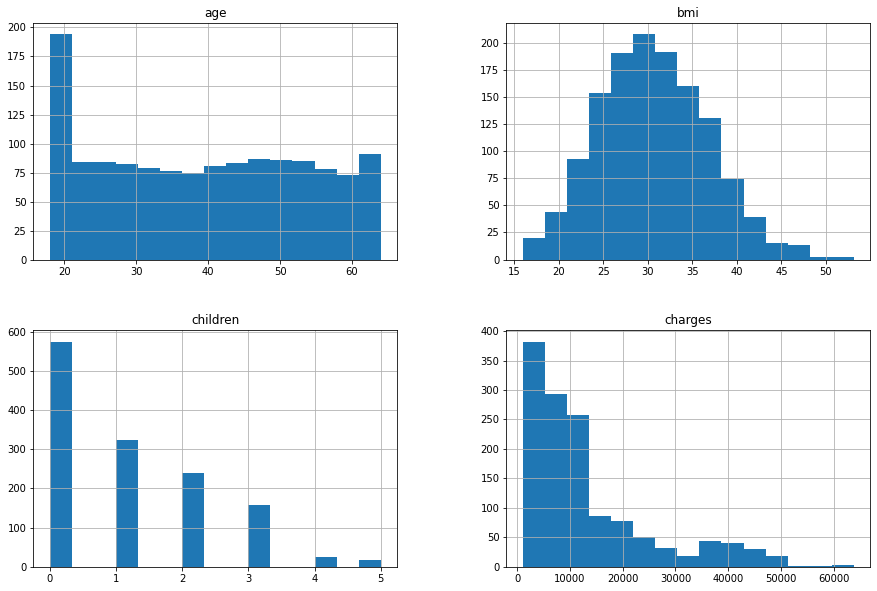

In [7]:
data.hist(bins=15, figsize=(15,10));

Podemos ver em nosso conjunto de dados que a maioria das entradas então por volta dos 20 anos, sem filhos e um índice de massa corporal por volta dos 30. Isso indica um ligeiro sobre peso do nosso dataset sendo que a OMS diz que dos 25 aos 29 é classificado como "Acima do peso" e acima dos 30 como "Obesidade".


Será interessante analisarmos como nosso modelo irá trabalhar em cima desses dados, porém deixarei essa parte mais a frente do nosso trabalho pois o Pycaret tem uma ferramenta poderosa para esse tipo de visualização.

## Separando o conjunto de treino e teste
Nessa etapa do nosso projeto iremos separar nosso conjunto entre treino e teste. Iremos retirar uma fração do nosso conjunto de dados para teste e o restante será usado como conjunto de treino.

In [8]:
# separando e dados de treino e teste
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

Temos 1204 entradas para o conjunto de treino e 134 para nosso conjunto de teste.

In [9]:
# verificando o tamanho dos conjuntos
print(train.shape)
print(test.shape)

(1204, 7)
(134, 7)


### Configurando o ambiente do Pycaret
Vamos importar os pacotes do Pycaret para começarmos a trabalhar em nosso modelo. 

In [10]:
#importando os pacotes necessarios
from pycaret.regression import *

Aqui vamos criar um regressor (reg) passar os dados e a variável alvo.

In [12]:
#criando o setup do Pycaret
reg = setup(data=train, target='charges')

,Description,Value
0,session_id,1756
1,Target,charges
2,Original Data,"(1204, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(842, 14)"


## Criando a Pipeline 

Através do setup, vamos passar cada etapa da nossa pipeline.

In [13]:
#criando a pipeline
reg = setup(data = data,
            target = 'charges',
            normalize = True,
            log_experiment = True,
            experiment_name = 'charge_01')

,Description,Value
0,session_id,1642
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


### Comparando modelos


Usaremos a função `compare_models()` que através da validação cruzada avalia a performance de todos os modelos da biblioteca do Pycaret.

Abaixo deixarei o dicionário dos tipos de avaliações que nossa função apresenta.

* MAE - Mean Absolute Error mostra a média de erro em valores absolutos.
* MSE - Mean Squared Error, Erro Quadrático Médio
* RMSE - Root Mean Squared Error, Raiz do Erro Quadrático Médio
* R2 - Coefficient of Determination R2 Score
* RMSLE - Root Mean Squared Log Error
* MAPE - Mean Absolute Percentage Error mostra a média do erro absoluto em valores percentuais.

In [14]:
#comparando os modelos
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2320.0441,1.910101e+07,4252.4633,0.8657,0.4021,0.2674,0.092
lightgbm,Light Gradient Boosting Machine,2625.2939,2.133851e+07,4508.5537,0.8514,0.4887,0.3280,0.090
rf,Random Forest Regressor,2541.0552,2.217116e+07,4609.4678,0.8452,0.4570,0.3109,0.553
ada,AdaBoost Regressor,3753.1893,2.330890e+07,4783.6743,0.8361,0.5722,0.6233,0.038
et,Extra Trees Regressor,2619.9964,2.566617e+07,4946.3163,0.8229,0.4741,0.3223,0.509
ridge,Ridge Regression,4154.2939,3.472685e+07,5850.7566,0.7585,0.6409,0.4245,0.015
llar,Lasso Least Angle Regression,4137.8425,3.470681e+07,5849.1032,0.7585,0.6681,0.4213,0.017
br,Bayesian Ridge,4151.3727,3.472876e+07,5851.0510,0.7584,0.6438,0.4240,0.017
lr,Linear Regression,4144.8161,3.473307e+07,5851.7095,0.7583,0.6501,0.4230,0.316
lasso,Lasso Regression,4144.8738,3.472797e+07,5851.2375,0.7583,0.6621,0.4230,0.017


Após a comparação, abaixo escolheremos o melhor modelo através do `best`.

In [15]:
#verificando o melhor parametro
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1642, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### Criando o Modelo

Como vimos acima, o melhor modelo para nosso dataser foi o Gradient Boosting Regressor.

Gradient Boosting é uma das técnicas mais poderosas para construir modelos preditivos.

Nessa parte, vamos dar apenas uma intuição sobre esse tipo de modelo. Somente o que você precisa para entender o motivo de escolhermos aqui.

Em termos muito básicos, Gradient Boosting envolve 3 elementos:

* Uma loss function para ser otimizada
* Um "Weak Learner" para fazer previsões
* Um modelo aditivo para adicionar aos Weak Learners para minimizar a loss function.

Basicamente, podemos dizer, em termos simples, que ele vai aprendendo com os erros e melhorando a cada passagem.

In [17]:
#instanciando o modelo
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2929.8666,3.109193e+07,5576.0137,0.8158,0.4409,0.2470
1,2196.2454,1.480423e+07,3847.6265,0.9215,0.3647,0.3112
2,1959.2872,1.482651e+07,3850.5213,0.9026,0.3111,0.2097
3,1709.9962,6.280301e+06,2506.0529,0.9459,0.3469,0.2928
4,1982.6605,1.061405e+07,3257.9205,0.9281,0.3234,0.2230
5,2529.7467,2.468032e+07,4967.9292,0.8742,0.4485,0.2970
6,3039.1536,3.049617e+07,5522.3341,0.7208,0.4578,0.3129
7,2463.2587,2.323607e+07,4820.3804,0.8504,0.4680,0.2728
8,2577.7802,2.470700e+07,4970.6138,0.7955,0.4505,0.2163
9,1812.4455,1.027356e+07,3205.2401,0.9023,0.4091,0.2912


In [18]:
#verificando os parametros
print(gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1642, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


Agora faremos o tuning do nosso modelo. Através da função `tune_model` buscaremos os melhores parâmetros para nosso modelo `gbr` (Gradient Boosting Regressor) com foco na métrica R2.

In [19]:
#tuning de parametros
tuned_gbr = tune_model(gbr, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3676.4998,3.908298e+07,6251.6384,0.7685,0.6090,0.3484
1,2438.4884,1.618422e+07,4022.9620,0.9142,0.3783,0.3220
2,2505.1003,1.807820e+07,4251.8463,0.8813,0.3427,0.2565
3,2150.5278,9.086263e+06,3014.3428,0.9218,0.4028,0.3632
4,2757.1769,1.464373e+07,3826.7133,0.9008,0.3625,0.2883
5,3240.3799,3.228997e+07,5682.4266,0.8354,0.5836,0.4078
6,3190.0246,3.064432e+07,5535.7315,0.7194,0.4726,0.3533
7,2674.0090,2.482148e+07,4982.1159,0.8402,0.5148,0.2953
8,2989.5478,2.561004e+07,5060.6363,0.7881,0.4409,0.2569
9,1970.4495,1.142629e+07,3380.2794,0.8913,0.5499,0.3033


Abaixo temos os parâmetros refinados para nosso modelo.

In [20]:
#verificando os parametros tunados
print(tuned_gbr)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=2,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=220,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1642, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


## Plotando Modelos 

A biblioteca Pycaret nos permite visualizar a performance do nosso modelo em cima do nosso dataset usando a função ` plot_model()` e passando a visualização desejada. 

Abaixo plotamos um gráfico para visualizar a importancia de cada feature para o resultado do nosso modelo.

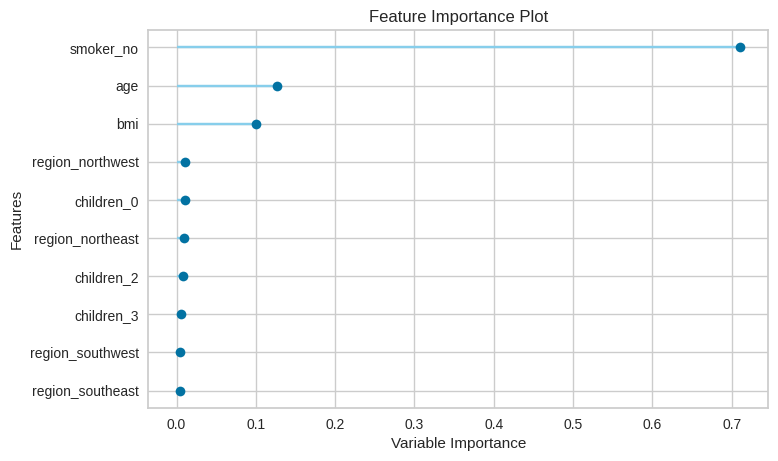

In [21]:
# importancia das features no modelo
plot_model(tuned_gbr, plot='feature')

Como podemos ver, o fato da pessoa ser fumante ou não tem grande importância no resultado do nosso modelo, seguido pela idade e o índice de massa corporal.

### Fazendo previsoes 

Antes de finalizarmos nosso modelo faremos uma checagem final, fazendo previsões no conjunto de teste e revisando as métricas de avaliação.

O objetivo aqui é verificar a diferença de performance entre os resultados da validação cruzada e dos dados novos.

In [22]:
#fazendo previsoes
predict_model(tuned_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3334.5159,3.026354e+07,5501.2309,0.7912,0.5373,0.3877




O R2 no conjunto de teste ficou em 0.7912, comparado a 0.8657 na média da validação cruzada. Essa não é uma diferença significante.

## Finalizando o modelo 

Iremos usar o finalize_model para dar o fit do modelo. O propósito disso é treinar o modelo no dataset completo antes de ser feito o deploy para produção.

In [23]:
#finalizando o modelo 
final_gbr = finalize_model(tuned_gbr)

In [24]:
#analizando a mudanca nos resultados
predict_model(final_gbr);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2650.752,2.022847e+07,4497.6072,0.8604,0.407,0.292


Repare que o R2 subiu de 0.7912 para 0.8604, apesar do modelo ser o mesmo. Isso acontece pois o modelo finalizado está sendo testado com dados que ele já viu, causando over-fitting.

## Prevendo em Dados Novos

Agora usaremos o conjunto de dados de teste, separados anteriormente e que nunca foram visto pelo nosso modelo do Pycaret. São 10% do nosso conjunto de dados orignal que ainda não tiveram contato com nosso modelo e serão perfeitos para simular novos dados reais.

In [25]:
#previsao com dados nao vistos
unseen_predictions = predict_model(final_gbr, data=test)
unseen_predictions.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,64,male,26.410,0,no,northeast,14394.55790,15182.647846
1,35,male,28.900,3,no,southwest,5926.84600,4860.278593
2,24,male,32.010,0,no,southeast,1981.58190,4388.682684
3,47,female,23.600,1,no,southwest,8539.67100,10456.227053
4,26,female,40.185,0,no,northwest,3201.24515,4639.819157


A coluna label é adicionada ao conjunto novo. O Label é o valor previsto pelo modelo GBR. Caso você prefira ter o valor arrendodado, também é possível passar round como parâmetro em predict_model().

### Salvando o Modelo

O Pycaret é tão simples que com a função `save_model` teremos nosso modelo salvo, treinado e pronto pra uso.

In [26]:
#salvando o modelo 
save_model(final_gbr,'Modelo_final_01_11_21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.3, loss='ls',
                                            max_depth=2, max_features='log2',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0,
                           

### Conclusão

O Pycaret confirma sua funcionalidade e facilidade. Com poucas linhas de código pudemos fazer todo nosso modelo de previsão em cima do nosso conjunto de dados. Apesar do resultado satisfatório em nosso projeto, ainda há espaço para uma maior análise dos dados e utilizar de diferentes métricas para avaliação do modelo. 